#**Hyper-Parameter Tuning**

Machine learning algorithms have hyperparameters that allow you to tailor the behavior of the algorithm to your specific dataset.

Hyperparameters are different from parameters, which are the internal coefficients or weights for a model found by the learning algorithm. Unlike parameters, hyperparameters are specified by the practitioner when configuring the model.

Typically, it is challenging to know what values to use for the hyperparameters of a given algorithm on a given dataset, therefore it is common to use random or grid search strategies for different hyperparameter values.

The more hyperparameters of an algorithm that you need to tune, the slower the tuning process. Therefore, it is desirable to select a minimum subset of model hyperparameters to search or tune.

Not all model hyperparameters are equally important. Some hyperparameters have an outsized effect on the behavior, and in turn, the performance of a machine learning algorithm.

As a machine learning practitioner, you must know which hyperparameters to focus on to get a good result quickly.

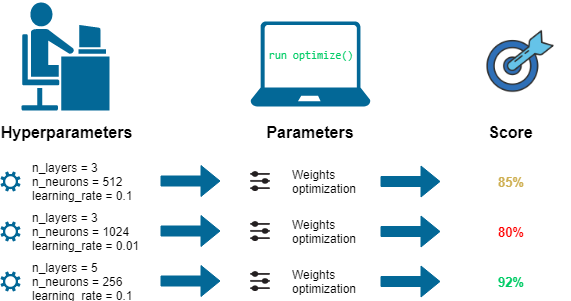

###***Hyper-Parameters for Logistic Regression***

Logistic regression does not really have any critical hyperparameters to tune.

Sometimes, you can see useful differences in performance or convergence with different solvers (solver).

* solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
Regularization (penalty) can sometimes be helpful.

* penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
Note: not all solvers support all regularization terms.

* The C parameter controls the penality strength, which can also be effective.
C in [100, 10, 1.0, 0.1, 0.01]

###***Hyper-Parameters for Ridge Classifier***

Ridge regression is a penalized linear regression model for predicting a numerical value.
Nevertheless, it can be very effective when applied to classification.
Perhaps the most important parameter to tune is the regularization strength (alpha). A good starting point might be values in the range [0.1 to 1.0]
* alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

###***Hyper-Parameters for K-Nearest Neighbors (KNN)***

The most important hyperparameter for KNN is the number of neighbors (n_neighbors).

Test values between at least 1 and 21, perhaps just the odd numbers.

* n_neighbors in [1 to 21]
It may also be interesting to test different distance metrics (metric) for choosing the composition of the neighborhood.

* metric in [‘euclidean’, ‘manhattan’, ‘minkowski’]

* weights in [‘uniform’, ‘distance’]

###***Hyper-Parameters for Support Vector Machine (SVM)***

The SVM algorithm, like gradient boosting, is very popular, very effective, and provides a large number of hyperparameters to tune.
Perhaps the first important parameter is the choice of kernel that will control the manner in which the input variables will be projected. There are many to choose from, but linear, polynomial, and RBF are the most common, perhaps just linear and RBF in practice.

* kernels in [‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’]
If the polynomial kernel works out, then it is a good idea to dive into the degree hyperparameter.

Another critical parameter is the penalty (C) that can take on a range of values and has a dramatic effect on the shape of the resulting regions for each class. A log scale might be a good starting point.

* C in [100, 10, 1.0, 0.1, 0.001]

###***Hyper-Parameters for Bagged Decision Trees (Bagging)***
The most important parameter for bagged decision trees is the number of trees (n_estimators).

Ideally, this should be increased until no further improvement is seen in the model.

Good values might be a log scale from 10 to 1,000.

* n_estimators in [10, 100, 1000]

###***Hyper-Parameters for Random Forest***
The most important parameter is the number of random features to sample at each split point (max_features).

You could try a range of integer values, such as 1 to 20, or 1 to half the number of input features.

* max_features [1 to 20]
Alternately, you could try a suite of different default value calculators.

* max_features in [‘sqrt’, ‘log2’]
Another important parameter for random forest is the number of trees * * ******(n_estimators).

Ideally, this should be increased until no further improvement is seen in the model.

Good values might be a log scale from 10 to 1,000.

* n_estimators in [10, 100, 1000]

###***Hyper-Parameters for Stochastic Gradient Boosting
Also called Gradient Boosting Machine (GBM) or named for the specific implementation, such as XGBoost.
The gradient boosting algorithm has many parameters to tune.

There are some parameter pairings that are important to consider. The first is the learning rate, also called shrinkage or eta (learning_rate) and the number of trees in the model (n_estimators). Both could be considered on a log scale, although in different directions.

* learning_rate in [0.001, 0.01, 0.1]
* n_estimators [10, 100, 1000]
Another pairing is the number of rows or subset of the data to consider for each tree (subsample) and the depth of each tree (max_depth). These could be grid searched at a 0.1 and 1 interval respectively, although common values can be tested directly.

* subsample in [0.5, 0.7, 1.0]
* max_depth in [3, 7, 9]

##**1-Logistic Regression**

Logistic regression does not really have any critical hyperparameters to tune.

Sometimes, you can see useful differences in performance or convergence with different solvers (solver).

* solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
Regularization (penalty) can sometimes be helpful.

* penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
Note: not all solvers support all regularization terms.

* The C parameter controls the penality strength, which can also be effective.
C in [100, 10, 1.0, 0.1, 0.01]

In [ ]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.952000 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.942000 (0.019391) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.940333 (0.024424) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.942000 (0.021354) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.944333 (0.020279) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.943000 (0.023259) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.942667 (0.021746) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.945333 (0.020287) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.942333 (0.021242) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.943000 (0.021315) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.946000 (0.020100) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.946333 (0.019576) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.946667 (0.019206) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.950333 (0.021211) wi

##**2-Ridge Classifier**

Ridge regression is a penalized linear regression model for predicting a numerical value.

Nevertheless, it can be very effective when applied to classification.

Perhaps the most important parameter to tune is the regularization strength (alpha). A good starting point might be values in the range [0.1 to 1.0]

* alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [ ]:
# example of grid searching key hyperparametres for ridge classifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.963667 using {'alpha': 0.1}
0.963667 (0.016630) with: {'alpha': 0.1}
0.963667 (0.016630) with: {'alpha': 0.2}
0.963667 (0.016630) with: {'alpha': 0.3}
0.963667 (0.016630) with: {'alpha': 0.4}
0.963667 (0.016630) with: {'alpha': 0.5}
0.963667 (0.016630) with: {'alpha': 0.6}
0.963667 (0.016630) with: {'alpha': 0.7}
0.963667 (0.016630) with: {'alpha': 0.8}
0.963667 (0.016630) with: {'alpha': 0.9}
0.963667 (0.016630) with: {'alpha': 1.0}


##**3-K-Nearest Neighbors (KNN)**

The most important hyperparameter for KNN is the number of neighbors (n_neighbors).

Test values between at least 1 and 21, perhaps just the odd numbers.

* n_neighbors in [1 to 21]
It may also be interesting to test different distance metrics (metric) for choosing the composition of the neighborhood.

* metric in [‘euclidean’, ‘manhattan’, ‘minkowski’]
It may also be interesting to test the contribution of members of the neighborhood via different weightings (weights).

* weights in [‘uniform’, ‘distance’]

In [ ]:
# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.972333 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
0.864000 (0.031581) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.864000 (0.031581) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.927667 (0.024857) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.927667 (0.024857) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.945333 (0.019788) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.945333 (0.019788) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.954000 (0.017626) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.954000 (0.017626) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.964000 (0.013808) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.964000 (0.013808) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.963333 

##**4-Support Vector Machine (SVM)**
The SVM algorithm, like gradient boosting, is very popular, very effective, and provides a large number of hyperparameters to tune.

Perhaps the first important parameter is the choice of kernel that will control the manner in which the input variables will be projected. There are many to choose from, but linear, polynomial, and RBF are the most common, perhaps just linear and RBF in practice.

* kernels in [‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’]
If the polynomial kernel works out, then it is a good idea to dive into the degree hyperparameter.

Another critical parameter is the penalty (C) that can take on a range of values and has a dramatic effect on the shape of the resulting regions for each class. A log scale might be a good starting point.

* C in [100, 10, 1.0, 0.1, 0.001]

In [ ]:
# example of grid searching key hyperparametres for SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.972000 using {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.970667 (0.014817) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.968667 (0.016275) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.947000 (0.026096) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.970667 (0.014817) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.968667 (0.016275) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.955333 (0.021561) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.969000 (0.014224) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.967667 (0.015206) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.961333 (0.019102) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.927333 (0.025811) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.972000 (0.012490) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.968667 (0.014772) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.927333 (0.025811) with: {'C': 0.01, 'gamma': 'scale',

##**5-Bagged Decision Trees (Bagging)**
The most important parameter for bagged decision trees is the number of trees (n_estimators).
Ideally, this should be increased until no further improvement is seen in the model.
Good values might be a log scale from 10 to 1,000.

* n_estimators in [10, 100, 1000]

In [ ]:
# example of grid searching key hyperparameters for BaggingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: ignored

##**6-Random Forest**

The most important parameter is the number of random features to sample at each split point (max_features).
You could try a range of integer values, such as 1 to 20, or 1 to half the number of input features.
* max_features [1 to 20]
Alternately, you could try a suite of different default value calculators.

* max_features in [‘sqrt’, ‘log2’]
Another important parameter for random forest is the number of trees (n_estimators).

Ideally, this should be increased until no further improvement is seen in the model.

Good values might be a log scale from 10 to 1,000.

* n_estimators in [10, 100, 1000]

In [ ]:
# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: ignored

##**7-Stochastic Gradient Boosting**

Also called Gradient Boosting Machine (GBM) or named for the specific implementation, such as XGBoost.

The gradient boosting algorithm has many parameters to tune.

There are some parameter pairings that are important to consider. The first is the learning rate, also called shrinkage or eta (learning_rate) and the number of trees in the model (n_estimators). Both could be considered on a log scale, although in different directions.

* learning_rate in [0.001, 0.01, 0.1]
* n_estimators [10, 100, 1000]
Another pairing is the number of rows or subset of the data to consider for each tree (subsample) and the depth of each tree (max_depth). These could be grid searched at a 0.1 and 1 interval respectively, although common values can be tested directly.

* subsample in [0.5, 0.7, 1.0]
* max_depth in [3, 7, 9]

In [ ]:
# example of grid searching key hyperparameters for GradientBoostingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: ignored

##**8-K-Means**

Tune the k-means model with the following hyperparameters. The hyperparameters that have the greatest impact on k-means objective metrics are: mini_batch_size, extra_center_factor, and init_method. Tuning the hyperparameter epochs generally results in minor improvements.

Parameter Name	Parameter Type	Recommended Ranges
* epochs	- MinValue: 1, MaxValue:10
* extra_center_factor	- MinValue: 4, MaxValue:10
* init_method	- ['kmeans++', 'random']
* mini_batch_size	- MinValue: 3000, MaxValue: